[View in Colaboratory](https://colab.research.google.com/github/adityasingh1993/100DayMLChallenge/blob/master/Word2VecPersonal_on_FB_Chat.ipynb)

In [0]:
from __future__ import absolute_import, division, print_function
import codecs
import glob
import re
import multiprocessing
import os
import nltk
import gensim.models.word2vec as w2v
import sklearn.manifold
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [0]:
book_filenames="message.txt"

In [0]:
import pickle
corpus_raw1=""
with open(book_filenames,"rb") as book_file:
    corpus_raw1=pickle.load(book_file)


In [0]:
print("length of corpus",len(corpus_raw1))

In [0]:
tokenizer=nltk.data.load("tokenizers/punkt/english.pickle")

In [0]:
corpus_raw1[3]

'are bottle nahi sarif ladki hai..:p'

In [0]:
message=""
for i in range(len(corpus_raw1)):
    message+=corpus_raw1[i]+" "

In [0]:
raw_sentences=tokenizer.tokenize(message)

In [0]:
def sentence_to_word_list(raw):
    clean=re.sub("[^a-zA-z]"," ",raw)
    words=clean.split()
    return words

In [0]:
def sentence_to_clean_list(raw):
    clean=re.sub("[^a-zA-z]"," ",raw)
    
    return clean

In [0]:
cleansentence=[]
for rc in corpus_raw1:
    if len(rc)>0:
        cleansentence.append(sentence_to_clean_list(rc))
        

In [0]:
cleansentence[2]

'Tu v chahe to join kr skti no prblm'

In [0]:
sentences=[]
for raw_sentence in raw_sentences:
    if len(raw_sentence)>0:
        sentences.append(sentence_to_word_list(raw_sentence))


In [0]:
print(raw_sentence[3])
print(sentences[2])

l
['Bottle', 'hi', 'dede', 'hmlog', 'kr', 'lenge', 'party', 'nhii', 'milega', 'tumlog', 'jo', 'aho', 'bolo', 'jo', 'aho', 'karo', 'aue', 'upar', 'se', 'party']


In [0]:
print(raw_sentences[5])
print(sentences[5])
jointsentence=[]
for i in range(len(sentences)):
        jointsentence.append(" ".join(sentences[i]))

tumlog itna kanjar ho!!>.
['tumlog', 'itna', 'kanjar', 'ho']


In [0]:
print(sentences[2])
len(sentences)

['Bottle', 'hi', 'dede', 'hmlog', 'kr', 'lenge', 'party', 'nhii', 'milega', 'tumlog', 'jo', 'aho', 'bolo', 'jo', 'aho', 'karo', 'aue', 'upar', 'se', 'party']


9233

In [0]:
token_count=[len(sentence) for sentence in sentences]
print(len(token_count))

9233


In [0]:
num_features=300
min_word_count=3
num_workers=multiprocessing.cpu_count()
context_size=7
downsampling=1e-3
seed=1

In [0]:
personal2vec=w2v.Word2Vec(sg=1,
                        seed=seed,
                        workers=num_workers,
                        size=num_features,
                        min_count=min_word_count,
                        window=context_size,
                        sample=downsampling)

In [0]:
personal2vec.build_vocab(sentences)

In [0]:
print("lenth of vocab",len(personal2vec.wv.vocab))
print(personal2vec.wv.vocab["gandu"])

lenth of vocab 6728
Vocab(count:156, index:234, sample_int:4294967296)


In [0]:
personal2vec.train(sentences,total_words=personal2vec.corpus_count,epochs=4000)

765551541

In [0]:
if not os.path.exists("trainedpersonal"):
    os.makedirs("trainedpersonal")
#thrones2vec.save(os.path.join("trained","w",))
import dill
with open("trainedpersonal/personal2vec.w2v",'wb') as f:
    dill.dump(personal2vec, f)

In [0]:
from sklearn.manifold import TSNE

In [0]:
personal2vec1=w2v.Word2Vec.load("trainedpersonal/personal2vec.w2v")

In [0]:
personal2vec1.wv.vocab["p"]

In [0]:
tsne=TSNE(n_components=2,random_state=0)

In [0]:
all_word_vectors_matrix=personal2vec1.wv.syn0

In [0]:
print(all_word_vectors_matrix)

[[ 0.02712977 -0.07516029  0.01863023 ...,  0.14252341 -0.06397169
  -0.12439929]
 [ 0.02158305  0.01402999  0.11217753 ..., -0.10430796  0.07280566
   0.01481795]
 [ 0.13002841 -0.09701044  0.06626165 ...,  0.06656294 -0.06680412
  -0.05440693]
 ..., 
 [ 0.09880266  0.52580726  0.64314991 ..., -0.32365835 -0.19673729
  -0.02556813]
 [-0.05115364  0.56533325 -0.2347004  ...,  0.13687174  0.56197536
  -0.91205281]
 [-0.01002562  0.49052596 -0.22836405 ..., -0.20563814  0.29438519
   0.01974302]]


In [0]:
all_word_vectors_matrix_2d=tsne.fit_transform(all_word_vectors_matrix)

In [0]:
import dill
with open("trainedpersonal/all_word_vectors_matrix.npy",'wb') as f:
    dill.dump(all_word_vectors_matrix, f)

In [0]:
all_word_vectors_matrix_2d=np.load("trainedpersonal/all_word_vectors_matrix.npy")

In [0]:
points=pd.DataFrame([
    (words,coords[0],coords[1])
    for words,coords in[ (words,all_word_vectors_matrix_2d[personal2vec1.wv.vocab[words].index])
                       for words in personal2vec1.wv.vocab
                      
                      ]
    
    
],columns=["Words","X","Y"])
print("new")

new


In [0]:
points.head(10)

,Words,X,Y
0,University,0.269791,-0.074651
1,agla,0.646787,0.787482
2,hI,0.404991,0.249235
3,aptii,-0.210201,-0.308743
4,kholenge,0.331240,0.001954
5,wake,-0.167095,0.305685
6,biwi,0.337712,0.325033
7,task,0.284019,0.207940
8,Kar,-0.269399,-0.113885
9,daru,0.546017,-0.239746


In [0]:
sb.set_context("poster")

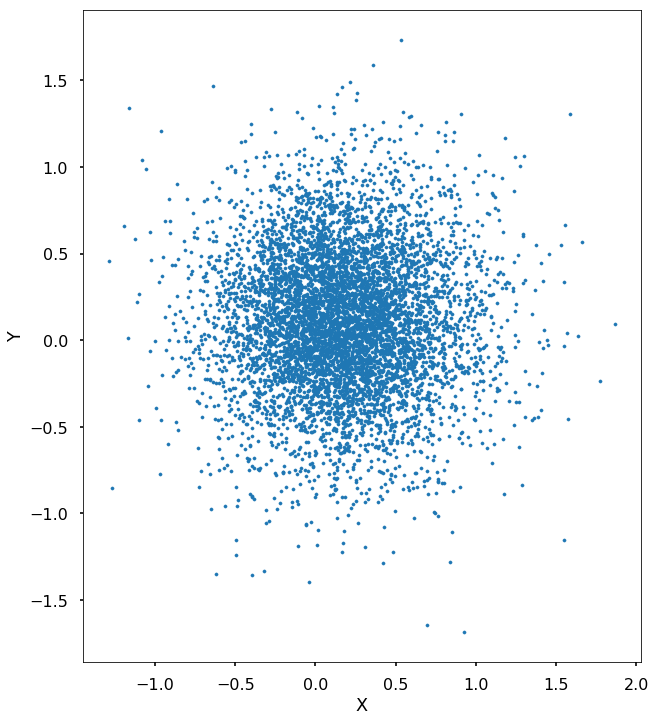

In [0]:
%matplotlib inline
points.plot.scatter("X","Y",s=10,figsize=(10,12))


In [0]:
def plot_zoom_image(x_bounds,y_bounds):
    slice=points[
        (x_bounds[0]<=points.X)&
        (points.X<=x_bounds[1])&
        (y_bounds[0]<points.Y)&
        (points.Y<=y_bounds[1])
    ]
    ax=slice.plot.scatter("X","Y",s=35,figsize=(10,8))
    for i, point in slice.iterrows():
        ax.text(point.X+0.005,point.Y+0.005,point.Words,fontsize=11)

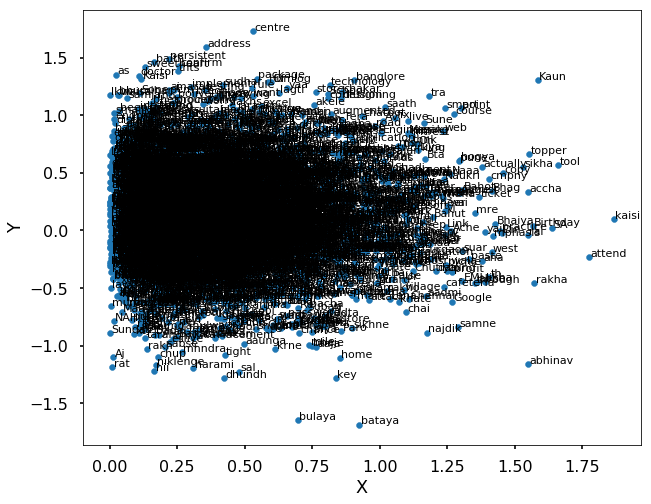

In [0]:
plot_zoom_image(x_bounds=(0,10),y_bounds=(-5,10))

In [0]:
personal2vec1.predict_output_word("meow")

[('w', 0.46886176),
 ('youtube', 0.0096092885),
 ('c', 0.0079274839),
 ('d', 0.0071930494),
 ('facebook', 0.0066315858),
 ('com', 0.0064253486),
 ('o', 0.0062238337),
 ('https', 0.0057383343),
 ('sara', 0.0050000092),
 ('www', 0.0044077951)]

In [0]:
personal2vec1.wv.most_similar("P")

[('hehehehe', 0.28879252076148987),
 ('aihe', 0.2808123230934143),
 ('cam', 0.26556849479675293),
 ('bandi', 0.2655562460422516),
 ('excited', 0.263117253780365),
 ('whts', 0.2624746263027191),
 ('seen', 0.25883734226226807),
 ('animesh', 0.2499234974384308),
 ('cute', 0.24626734852790833),
 ('heart', 0.24468019604682922)]

In [0]:
personal2vec1.wv["p"]

array([  4.41099346e-01,   1.09573871e-01,   4.07547742e-01,
         2.07570463e-01,  -4.34752181e-02,   1.13356858e-01,
         1.75225303e-01,   5.40629804e-01,   1.64466098e-01,
        -4.10555184e-01,   2.68120110e-01,   1.48015052e-01,
        -3.28013636e-02,   5.61205924e-01,  -2.35257581e-01,
        -2.25858122e-01,  -5.25620058e-02,   3.00913546e-02,
         1.67856991e-01,   7.20197856e-02,  -1.19362009e+00,
        -2.17866927e-01,  -2.62672782e-01,   2.63547059e-02,
         6.06442168e-02,  -5.59199154e-01,  -9.02029872e-02,
        -1.42825142e-01,   1.32624432e-01,  -1.77428171e-01,
         9.23503339e-02,   3.66749346e-01,   6.58591449e-01,
        -2.47448117e-01,  -6.14161134e-01,   8.98439527e-01,
        -1.71901703e-01,  -7.06025898e-01,  -1.06678315e-01,
        -5.65070689e-01,   7.85568774e-01,   5.29731214e-01,
         1.90540567e-01,   4.05803055e-01,   1.02714159e-01,
         2.61269808e-01,   1.40429670e-02,   1.32923620e-02,
        -6.18724823e-02,

In [0]:
personal2vec1.wv.index2word[2000]

'jhagra'

In [0]:
personal2vec1.wv.word2index["hi"]

AttributeError: 'EuclideanKeyedVectors' object has no attribute 'word2index'

In [0]:
personal2vec1.save("trainedpersonal/personal2vec")

In [0]:
len(personal2vec1.wv.vocab)

6728

In [0]:
len(cleansentence)

51815

In [0]:
def convert_train_data(filename):
    trainX1=[]
    trainY1=[]
    for i in range(0,len(filename),2):
        trainX1.append(filename[i])
        if i+1<=(len(filename)-1):
            trainY1.append(filename[i+1])
    
        print(i)
    return trainX1,trainY1

        

In [0]:
X1,Y1=convert_train_data(cleansentence)

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98
100
102
104
106
108
110
112
114
116
118
120
122
124
126
128
130
132
134
136
138
140
142
144
146
148
150
152
154
156
158
160
162
164
166
168
170
172
174
176
178
180
182
184
186
188
190
192
194
196
198
200
202
204
206
208
210
212
214
216
218
220
222
224
226
228
230
232
234
236
238
240
242
244
246
248
250
252
254
256
258
260
262
264
266
268
270
272
274
276
278
280
282
284
286
288
290
292
294
296
298
300
302
304
306
308
310
312
314
316
318
320
322
324
326
328
330
332
334
336
338
340
342
344
346
348
350
352
354
356
358
360
362
364
366
368
370
372
374
376
378
380
382
384
386
388
390
392
394
396
398
400
402
404
406
408
410
412
414
416
418
420
422
424
426
428
430
432
434
436
438
440
442
444
446
448
450
452
454
456
458
460
462
464
466
468
470
472
474
476
478
480
482
484
486
488
490
492
494
496
498
500
502
504
506
508
510
512
514
516
518
520
522
524
526

6732
6734
6736
6738
6740
6742
6744
6746
6748
6750
6752
6754
6756
6758
6760
6762
6764
6766
6768
6770
6772
6774
6776
6778
6780
6782
6784
6786
6788
6790
6792
6794
6796
6798
6800
6802
6804
6806
6808
6810
6812
6814
6816
6818
6820
6822
6824
6826
6828
6830
6832
6834
6836
6838
6840
6842
6844
6846
6848
6850
6852
6854
6856
6858
6860
6862
6864
6866
6868
6870
6872
6874
6876
6878
6880
6882
6884
6886
6888
6890
6892
6894
6896
6898
6900
6902
6904
6906
6908
6910
6912
6914
6916
6918
6920
6922
6924
6926
6928
6930
6932
6934
6936
6938
6940
6942
6944
6946
6948
6950
6952
6954
6956
6958
6960
6962
6964
6966
6968
6970
6972
6974
6976
6978
6980
6982
6984
6986
6988
6990
6992
6994
6996
6998
7000
7002
7004
7006
7008
7010
7012
7014
7016
7018
7020
7022
7024
7026
7028
7030
7032
7034
7036
7038
7040
7042
7044
7046
7048
7050
7052
7054
7056
7058
7060
7062
7064
7066
7068
7070
7072
7074
7076
7078
7080
7082
7084
7086
7088
7090
7092
7094
7096
7098
7100
7102
7104
7106
7108
7110
7112
7114
7116
7118
7120
7122
7124
7126
7128
7130


11060
11062
11064
11066
11068
11070
11072
11074
11076
11078
11080
11082
11084
11086
11088
11090
11092
11094
11096
11098
11100
11102
11104
11106
11108
11110
11112
11114
11116
11118
11120
11122
11124
11126
11128
11130
11132
11134
11136
11138
11140
11142
11144
11146
11148
11150
11152
11154
11156
11158
11160
11162
11164
11166
11168
11170
11172
11174
11176
11178
11180
11182
11184
11186
11188
11190
11192
11194
11196
11198
11200
11202
11204
11206
11208
11210
11212
11214
11216
11218
11220
11222
11224
11226
11228
11230
11232
11234
11236
11238
11240
11242
11244
11246
11248
11250
11252
11254
11256
11258
11260
11262
11264
11266
11268
11270
11272
11274
11276
11278
11280
11282
11284
11286
11288
11290
11292
11294
11296
11298
11300
11302
11304
11306
11308
11310
11312
11314
11316
11318
11320
11322
11324
11326
11328
11330
11332
11334
11336
11338
11340
11342
11344
11346
11348
11350
11352
11354
11356
11358
11360
11362
11364
11366
11368
11370
11372
11374
11376
11378
11380
11382
11384
11386
11388
11390
1139

15534
15536
15538
15540
15542
15544
15546
15548
15550
15552
15554
15556
15558
15560
15562
15564
15566
15568
15570
15572
15574
15576
15578
15580
15582
15584
15586
15588
15590
15592
15594
15596
15598
15600
15602
15604
15606
15608
15610
15612
15614
15616
15618
15620
15622
15624
15626
15628
15630
15632
15634
15636
15638
15640
15642
15644
15646
15648
15650
15652
15654
15656
15658
15660
15662
15664
15666
15668
15670
15672
15674
15676
15678
15680
15682
15684
15686
15688
15690
15692
15694
15696
15698
15700
15702
15704
15706
15708
15710
15712
15714
15716
15718
15720
15722
15724
15726
15728
15730
15732
15734
15736
15738
15740
15742
15744
15746
15748
15750
15752
15754
15756
15758
15760
15762
15764
15766
15768
15770
15772
15774
15776
15778
15780
15782
15784
15786
15788
15790
15792
15794
15796
15798
15800
15802
15804
15806
15808
15810
15812
15814
15816
15818
15820
15822
15824
15826
15828
15830
15832
15834
15836
15838
15840
15842
15844
15846
15848
15850
15852
15854
15856
15858
15860
15862
15864
1586

19734
19736
19738
19740
19742
19744
19746
19748
19750
19752
19754
19756
19758
19760
19762
19764
19766
19768
19770
19772
19774
19776
19778
19780
19782
19784
19786
19788
19790
19792
19794
19796
19798
19800
19802
19804
19806
19808
19810
19812
19814
19816
19818
19820
19822
19824
19826
19828
19830
19832
19834
19836
19838
19840
19842
19844
19846
19848
19850
19852
19854
19856
19858
19860
19862
19864
19866
19868
19870
19872
19874
19876
19878
19880
19882
19884
19886
19888
19890
19892
19894
19896
19898
19900
19902
19904
19906
19908
19910
19912
19914
19916
19918
19920
19922
19924
19926
19928
19930
19932
19934
19936
19938
19940
19942
19944
19946
19948
19950
19952
19954
19956
19958
19960
19962
19964
19966
19968
19970
19972
19974
19976
19978
19980
19982
19984
19986
19988
19990
19992
19994
19996
19998
20000
20002
20004
20006
20008
20010
20012
20014
20016
20018
20020
20022
20024
20026
20028
20030
20032
20034
20036
20038
20040
20042
20044
20046
20048
20050
20052
20054
20056
20058
20060
20062
20064
2006

23326
23328
23330
23332
23334
23336
23338
23340
23342
23344
23346
23348
23350
23352
23354
23356
23358
23360
23362
23364
23366
23368
23370
23372
23374
23376
23378
23380
23382
23384
23386
23388
23390
23392
23394
23396
23398
23400
23402
23404
23406
23408
23410
23412
23414
23416
23418
23420
23422
23424
23426
23428
23430
23432
23434
23436
23438
23440
23442
23444
23446
23448
23450
23452
23454
23456
23458
23460
23462
23464
23466
23468
23470
23472
23474
23476
23478
23480
23482
23484
23486
23488
23490
23492
23494
23496
23498
23500
23502
23504
23506
23508
23510
23512
23514
23516
23518
23520
23522
23524
23526
23528
23530
23532
23534
23536
23538
23540
23542
23544
23546
23548
23550
23552
23554
23556
23558
23560
23562
23564
23566
23568
23570
23572
23574
23576
23578
23580
23582
23584
23586
23588
23590
23592
23594
23596
23598
23600
23602
23604
23606
23608
23610
23612
23614
23616
23618
23620
23622
23624
23626
23628
23630
23632
23634
23636
23638
23640
23642
23644
23646
23648
23650
23652
23654
23656
2365

26950
26952
26954
26956
26958
26960
26962
26964
26966
26968
26970
26972
26974
26976
26978
26980
26982
26984
26986
26988
26990
26992
26994
26996
26998
27000
27002
27004
27006
27008
27010
27012
27014
27016
27018
27020
27022
27024
27026
27028
27030
27032
27034
27036
27038
27040
27042
27044
27046
27048
27050
27052
27054
27056
27058
27060
27062
27064
27066
27068
27070
27072
27074
27076
27078
27080
27082
27084
27086
27088
27090
27092
27094
27096
27098
27100
27102
27104
27106
27108
27110
27112
27114
27116
27118
27120
27122
27124
27126
27128
27130
27132
27134
27136
27138
27140
27142
27144
27146
27148
27150
27152
27154
27156
27158
27160
27162
27164
27166
27168
27170
27172
27174
27176
27178
27180
27182
27184
27186
27188
27190
27192
27194
27196
27198
27200
27202
27204
27206
27208
27210
27212
27214
27216
27218
27220
27222
27224
27226
27228
27230
27232
27234
27236
27238
27240
27242
27244
27246
27248
27250
27252
27254
27256
27258
27260
27262
27264
27266
27268
27270
27272
27274
27276
27278
27280
2728

31010
31012
31014
31016
31018
31020
31022
31024
31026
31028
31030
31032
31034
31036
31038
31040
31042
31044
31046
31048
31050
31052
31054
31056
31058
31060
31062
31064
31066
31068
31070
31072
31074
31076
31078
31080
31082
31084
31086
31088
31090
31092
31094
31096
31098
31100
31102
31104
31106
31108
31110
31112
31114
31116
31118
31120
31122
31124
31126
31128
31130
31132
31134
31136
31138
31140
31142
31144
31146
31148
31150
31152
31154
31156
31158
31160
31162
31164
31166
31168
31170
31172
31174
31176
31178
31180
31182
31184
31186
31188
31190
31192
31194
31196
31198
31200
31202
31204
31206
31208
31210
31212
31214
31216
31218
31220
31222
31224
31226
31228
31230
31232
31234
31236
31238
31240
31242
31244
31246
31248
31250
31252
31254
31256
31258
31260
31262
31264
31266
31268
31270
31272
31274
31276
31278
31280
31282
31284
31286
31288
31290
31292
31294
31296
31298
31300
31302
31304
31306
31308
31310
31312
31314
31316
31318
31320
31322
31324
31326
31328
31330
31332
31334
31336
31338
31340
3134

34942
34944
34946
34948
34950
34952
34954
34956
34958
34960
34962
34964
34966
34968
34970
34972
34974
34976
34978
34980
34982
34984
34986
34988
34990
34992
34994
34996
34998
35000
35002
35004
35006
35008
35010
35012
35014
35016
35018
35020
35022
35024
35026
35028
35030
35032
35034
35036
35038
35040
35042
35044
35046
35048
35050
35052
35054
35056
35058
35060
35062
35064
35066
35068
35070
35072
35074
35076
35078
35080
35082
35084
35086
35088
35090
35092
35094
35096
35098
35100
35102
35104
35106
35108
35110
35112
35114
35116
35118
35120
35122
35124
35126
35128
35130
35132
35134
35136
35138
35140
35142
35144
35146
35148
35150
35152
35154
35156
35158
35160
35162
35164
35166
35168
35170
35172
35174
35176
35178
35180
35182
35184
35186
35188
35190
35192
35194
35196
35198
35200
35202
35204
35206
35208
35210
35212
35214
35216
35218
35220
35222
35224
35226
35228
35230
35232
35234
35236
35238
35240
35242
35244
35246
35248
35250
35252
35254
35256
35258
35260
35262
35264
35266
35268
35270
35272
3527

39522
39524
39526
39528
39530
39532
39534
39536
39538
39540
39542
39544
39546
39548
39550
39552
39554
39556
39558
39560
39562
39564
39566
39568
39570
39572
39574
39576
39578
39580
39582
39584
39586
39588
39590
39592
39594
39596
39598
39600
39602
39604
39606
39608
39610
39612
39614
39616
39618
39620
39622
39624
39626
39628
39630
39632
39634
39636
39638
39640
39642
39644
39646
39648
39650
39652
39654
39656
39658
39660
39662
39664
39666
39668
39670
39672
39674
39676
39678
39680
39682
39684
39686
39688
39690
39692
39694
39696
39698
39700
39702
39704
39706
39708
39710
39712
39714
39716
39718
39720
39722
39724
39726
39728
39730
39732
39734
39736
39738
39740
39742
39744
39746
39748
39750
39752
39754
39756
39758
39760
39762
39764
39766
39768
39770
39772
39774
39776
39778
39780
39782
39784
39786
39788
39790
39792
39794
39796
39798
39800
39802
39804
39806
39808
39810
39812
39814
39816
39818
39820
39822
39824
39826
39828
39830
39832
39834
39836
39838
39840
39842
39844
39846
39848
39850
39852
3985

42952
42954
42956
42958
42960
42962
42964
42966
42968
42970
42972
42974
42976
42978
42980
42982
42984
42986
42988
42990
42992
42994
42996
42998
43000
43002
43004
43006
43008
43010
43012
43014
43016
43018
43020
43022
43024
43026
43028
43030
43032
43034
43036
43038
43040
43042
43044
43046
43048
43050
43052
43054
43056
43058
43060
43062
43064
43066
43068
43070
43072
43074
43076
43078
43080
43082
43084
43086
43088
43090
43092
43094
43096
43098
43100
43102
43104
43106
43108
43110
43112
43114
43116
43118
43120
43122
43124
43126
43128
43130
43132
43134
43136
43138
43140
43142
43144
43146
43148
43150
43152
43154
43156
43158
43160
43162
43164
43166
43168
43170
43172
43174
43176
43178
43180
43182
43184
43186
43188
43190
43192
43194
43196
43198
43200
43202
43204
43206
43208
43210
43212
43214
43216
43218
43220
43222
43224
43226
43228
43230
43232
43234
43236
43238
43240
43242
43244
43246
43248
43250
43252
43254
43256
43258
43260
43262
43264
43266
43268
43270
43272
43274
43276
43278
43280
43282
4328

47140
47142
47144
47146
47148
47150
47152
47154
47156
47158
47160
47162
47164
47166
47168
47170
47172
47174
47176
47178
47180
47182
47184
47186
47188
47190
47192
47194
47196
47198
47200
47202
47204
47206
47208
47210
47212
47214
47216
47218
47220
47222
47224
47226
47228
47230
47232
47234
47236
47238
47240
47242
47244
47246
47248
47250
47252
47254
47256
47258
47260
47262
47264
47266
47268
47270
47272
47274
47276
47278
47280
47282
47284
47286
47288
47290
47292
47294
47296
47298
47300
47302
47304
47306
47308
47310
47312
47314
47316
47318
47320
47322
47324
47326
47328
47330
47332
47334
47336
47338
47340
47342
47344
47346
47348
47350
47352
47354
47356
47358
47360
47362
47364
47366
47368
47370
47372
47374
47376
47378
47380
47382
47384
47386
47388
47390
47392
47394
47396
47398
47400
47402
47404
47406
47408
47410
47412
47414
47416
47418
47420
47422
47424
47426
47428
47430
47432
47434
47436
47438
47440
47442
47444
47446
47448
47450
47452
47454
47456
47458
47460
47462
47464
47466
47468
47470
4747

In [0]:
len(X1)

25908

In [0]:
len(Y1)

25907

In [0]:
X1

['Tu degi nhi to kya kre',
 'Tu v chahe to join kr skti no prblm',
 'kaminaa     ',
 'nhii milega   tumlog jo  aho bolo   jo  aho karo   aue upar se party  ',
 'marende das lat afaque     ',
 'abe tum to bat karte ho sale',
 'Hmko v nhi janti h thk saala engg k   saal waste ho gue',
 'party re',
 'abe omie sirf tere ko degi afaque   P',
 'kaun naya guest  ',
 'kya      up karo  ',
 'Guest kisi ke v ho mgr paid tmhe hi krna hoga',
 'Haa usko bula skti ho uska v treat baki h',
 'suno   aditya   muje pk  ugly  alone  khamoshiyaan tevar  aihe     plzz download karke rakhna  ',
 'Sirf mai tera dard smjhta hu   ',
 'okk',
 'hmm   ye a  a hain  ',
 'Q apne dosto ko nhi denge kya hmlog',
 'aur tumlog kitne sare ho   ',
 ' up karo  ',
 'Haa ye idea acha h',
 'aur tumlog muje toh lag raha hain harbar diye ho    ',
 '  saal me phli baar prty de rhi h',
 'plzz   yaar us se mera baat nhii hota hain    ',
 'Kch to gadbad h daya',
 'Hmmmmm',
 'ab tu shortlist kar le fir',
 'a  a',
 'gaurav',
 'vishal

In [0]:
len(Y1)

25907

In [0]:
del X1[-1]

In [0]:
len(X1)

25907

In [0]:
chatdata={"Request":X1,"Response":Y1}

In [0]:
import pandas as pd

In [0]:
dataframe=pd.DataFrame(chatdata)

In [0]:
filepath="trainedpersonal/chatdata.xlsx"

In [0]:
dataframe.to_excel(filepath,index=True)